<a href="https://colab.research.google.com/github/Al3jandraMtz/Proyecto4_DataLab/blob/main/P4_DataLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Normalización de datos exploracion de palabras
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/cleaned_URL_content_ - results-20240814-093353.csv')

# Split the columns with multiple values
df['user_id'] = df['user_id'].str.split(',')
df['user_name'] = df['user_name'].str.split(',')
df['review_id'] = df['review_id'].str.split(',')
df['review_title'] = df['review_title'].str.split(',')
df['cleaned_review_content'] = df['cleaned_review_content'].str.split(',')

# Ensure all lists have the same length by finding the minimum length
# using map and then apply the min length to all columns
min_len = df[['user_id', 'user_name', 'review_id', 'review_title', 'cleaned_review_content']].applymap(len).min(axis=1)

df['user_id'] = df['user_id'].apply(lambda x: x[:min(min_len)])
df['user_name'] = df['user_name'].apply(lambda x: x[:min(min_len)])
df['review_id'] = df['review_id'].apply(lambda x: x[:min(min_len)])
df['review_title'] = df['review_title'].apply(lambda x: x[:min(min_len)])
df['cleaned_review_content'] = df['cleaned_review_content'].apply(lambda x: x[:min(min_len)])

# Explode the columns
df = df.explode(['user_id', 'user_name', 'review_id', 'review_title', 'cleaned_review_content'])

# Clean up the rating_count by removing commas and converting to integer
df['rating_count'] = df['rating_count'].str.replace(',', '').fillna(0).astype(int)

# Convert rating to float
df['adjusted_rating'] = df['adjusted_rating'].astype(float)

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)


<ipython-input-2-44342e65b297>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  min_len = df[['user_id', 'user_name', 'review_id', 'review_title', 'cleaned_review_content']].applymap(len).min(axis=1)


In [4]:
#Analisis de Sentimientos
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Descargar el recurso vader_lexicon
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Cargar el DataFrame
df = pd.read_csv('/content/Data-Set-Limpio - Data_Set.csv')
# Función para analizar el sentimiento y extraer palabras
def extract_sentiment_words(text):
    sentiment_words = {'positive': [], 'negative': []}
    # Analizar el sentimiento de cada palabra en el texto
    for word in text.split():
        sentiment = sia.polarity_scores(word)
        if sentiment['compound'] >= 0.05:  # Umbral para positivo
            sentiment_words['positive'].append(word)
        elif sentiment['compound'] <= -0.05:  # Umbral para negativo
            sentiment_words['negative'].append(word)
    return sentiment_words

# Aplicar la función a la columna cleaned_review_content
df['sentiment_words'] = df['cleaned_review_content'].apply(extract_sentiment_words)

# Contar las palabras más comunes en positivas y negativas
positive_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['positive']) for word in words])
negative_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['negative']) for word in words])

# Imprimir los resultados
print("Top Positive Words:")
print(positive_words.most_common(20))

print("\nTop Negative Words:")
print(negative_words.most_common(20))

# Guardar los resultados en un nuevo CSV en el directorio actual
df.to_csv('results.csv', index=False)

# Mostrar el resultado
print(df[['review_title', 'cleaned_review_content', 'sentiment_words']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Top Positive Words:
[('good', 1726), ('like', 462), ('better', 276), ('well', 252), ('great', 221), ('fine', 187), ('best', 172), ('Good', 163), ('Amazon', 161), ('nice', 150), ('easy', 136), ('want', 127), ('worth', 125), ('value', 109), ('support', 108), ('smart', 105), ('ok', 88), ('original', 85), ('recommend', 81), ('top', 77)]

Top Negative Words:
[('no', 345), ('problem', 143), ('No', 114), ('bad', 107), ('low', 92), ('lag', 54), ('poor', 37), ('hard', 36), ('charged', 32), ('missing', 31), ('Fire', 31), ('lower', 30), ('pay', 28), ('disappointed', 28), ('lags', 27), ('damaged', 27), ('Ill', 27), ('problems', 26), ('screws', 26), ('complain', 24)]
                                          review_title  \
0    Design Optimised for Functionality Durability ...   
1    Liked itUser friendly and effectiveNot as per ...   
2    Nice chopperSmall easy use n cleanNot goodGood...   
3    As this was my nd order for same productnd tim...   
4    Not badGood for engineersGoodits great Goo

In [6]:
#Analisis de Sentimientos acomodo de palabras positivas/negativas
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Descargar el recurso vader_lexicon
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Cargar el DataFrame
df = pd.read_csv('/content/cleaned_URL_content_ - results-20240814-093353.csv')

# Función para analizar el sentimiento y extraer palabras
def extract_sentiment_words(text):
    sentiment_words = {'positive': [], 'negative': []}
    # Analizar el sentimiento de cada palabra en el texto
    for word in text.split():
        sentiment = sia.polarity_scores(word)
        if sentiment['compound'] >= 0.05:  # Umbral para positivo
            sentiment_words['positive'].append(word)
        elif sentiment['compound'] <= -0.05:  # Umbral para negativo
            sentiment_words['negative'].append(word)
    return sentiment_words

# Aplicar la función a la columna cleaned_review_content
df['sentiment_words'] = df['cleaned_review_content'].apply(extract_sentiment_words)

# Contar las palabras más comunes en positivas y negativas
positive_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['positive']) for word in words])
negative_words = Counter([word for words in df['sentiment_words'].apply(lambda x: x['negative']) for word in words])

# Crear DataFrame para las Top Positive Words
df_positive = pd.DataFrame(positive_words.most_common(20), columns=['Word', 'Count'])
df_positive['Sentiment'] = 'Positive'

# Crear DataFrame para las Top Negative Words
df_negative = pd.DataFrame(negative_words.most_common(20), columns=['Word', 'Count'])
df_negative['Sentiment'] = 'Negative'

# Combinar ambos DataFrames
df_top_words = pd.concat([df_positive, df_negative])

# Guardar los resultados en un nuevo CSV en el directorio actual
df_top_words.to_csv('top_sentiment_words.csv', index=False)

# Mostrar el DataFrame resultante
print(df_top_words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Word  Count Sentiment
0           good   3748  Positive
1           like   1028  Positive
2           easy    626  Positive
3           well    626  Positive
4         better    517  Positive
5          great    475  Positive
6           best    443  Positive
7           Good    392  Positive
8           fine    386  Positive
9           nice    358  Positive
10        Amazon    301  Positive
11         worth    273  Positive
12          want    262  Positive
13         value    248  Positive
14      original    214  Positive
15     recommend    205  Positive
16        easily    202  Positive
17       support    194  Positive
18        useful    183  Positive
19            ok    173  Positive
0             no    750  Negative
1        problem    282  Negative
2            low    243  Negative
3             No    215  Negative
4            bad    187  Negative
5           hard    126  Negative
6        stopped     88  Negative
7           poor     82  Negative
8      difficu

In [8]:
#Normalizacion de review_id, user_name, user_id
expanded_rows = []

# Cargar el DataFrame
df = pd.read_csv('/content/amazon - amazon_review.csv')

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Split the columns by comma
    user_ids = row['user_id'].split(',')
    user_names = row['user_name'].split(',')
    review_ids = row['review_id'].split(',')
    review_titles = row['review_title'].split(',')
    review_contents = row['review_content'].split(',')

    # Count the number of reviews
    num_reviews = len(user_ids)

    # Check for consistency
    consistent = (len(user_names) == num_reviews and
                  len(review_ids) == num_reviews and
                  len(review_titles) == num_reviews and
                  len(review_contents) == num_reviews)

    # For each review, create a new row in the expanded DataFrame
    for i in range(num_reviews):
        expanded_rows.append({
            'user_id': user_ids[i],
            'user_name': user_names[i],
            'review_id': review_ids[i],
            'review_title': review_titles[i],
            'review_content': review_contents[i],
            'img_link': row['img_link'],
            'product_link': row['product_link'],
            'product_id': row['product_id'],
            'rating': row['rating'],
            'rating_count': row['rating_count'],
            'mismatch': not consistent
        })

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Guardar los resultados en un nuevo CSV en el directorio actual
df.to_csv('amazon_review_expanded.csv', index=False)

# Display the first few rows of the new DataFrame
expanded_df.head()


,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_id,rating,rating_count,mismatch
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav,R3HXWT0LRP0NMF,Satisfied,Looks durable Charging is fine tooNo complains,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta,R2AJM3LFTLZHFO,Charging is really fast,Charging is really fast,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep,R6AQJGUP6P86,Value for money,good product.,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed,R1KD19VHEDV0OR,Product review,Till now satisfied with the quality.,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh,R3C02RMYQMK6FC,Good quality,This is a good product . The charging speed is...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B07JW9H4J1,4.2,"24,269",True


In [22]:
# Cargar el DataFrame
df = pd.read_csv('/content/Data-Set-Limpio - Data_Set.csv')

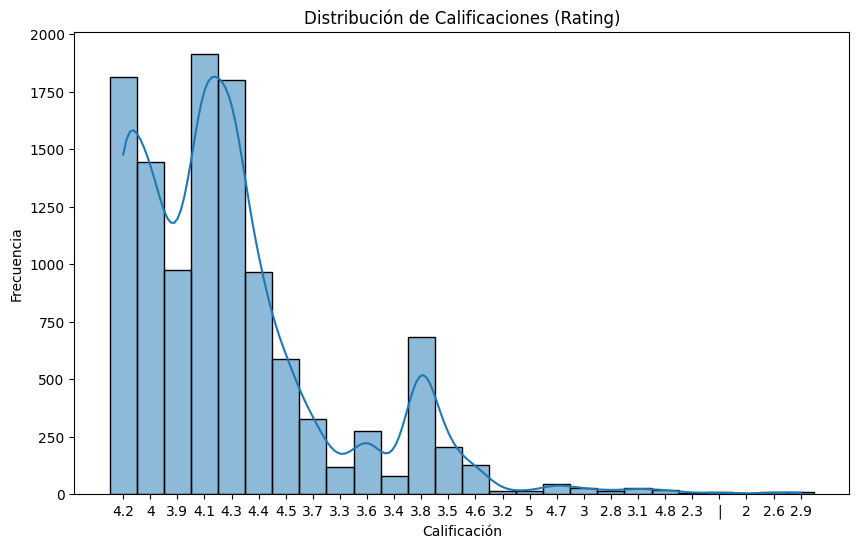

In [23]:
# Cargar el DataFrame
df = pd.read_csv('/content/Data-Set-Limpio - Data_Set.csv')

#Visualizar Distribuicion
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la distribución de la variable 'rating'
plt.figure(figsize=(10, 6))
sns.histplot(expanded_df['rating'], bins=10, kde=True)
plt.title('Distribución de Calificaciones (Rating)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


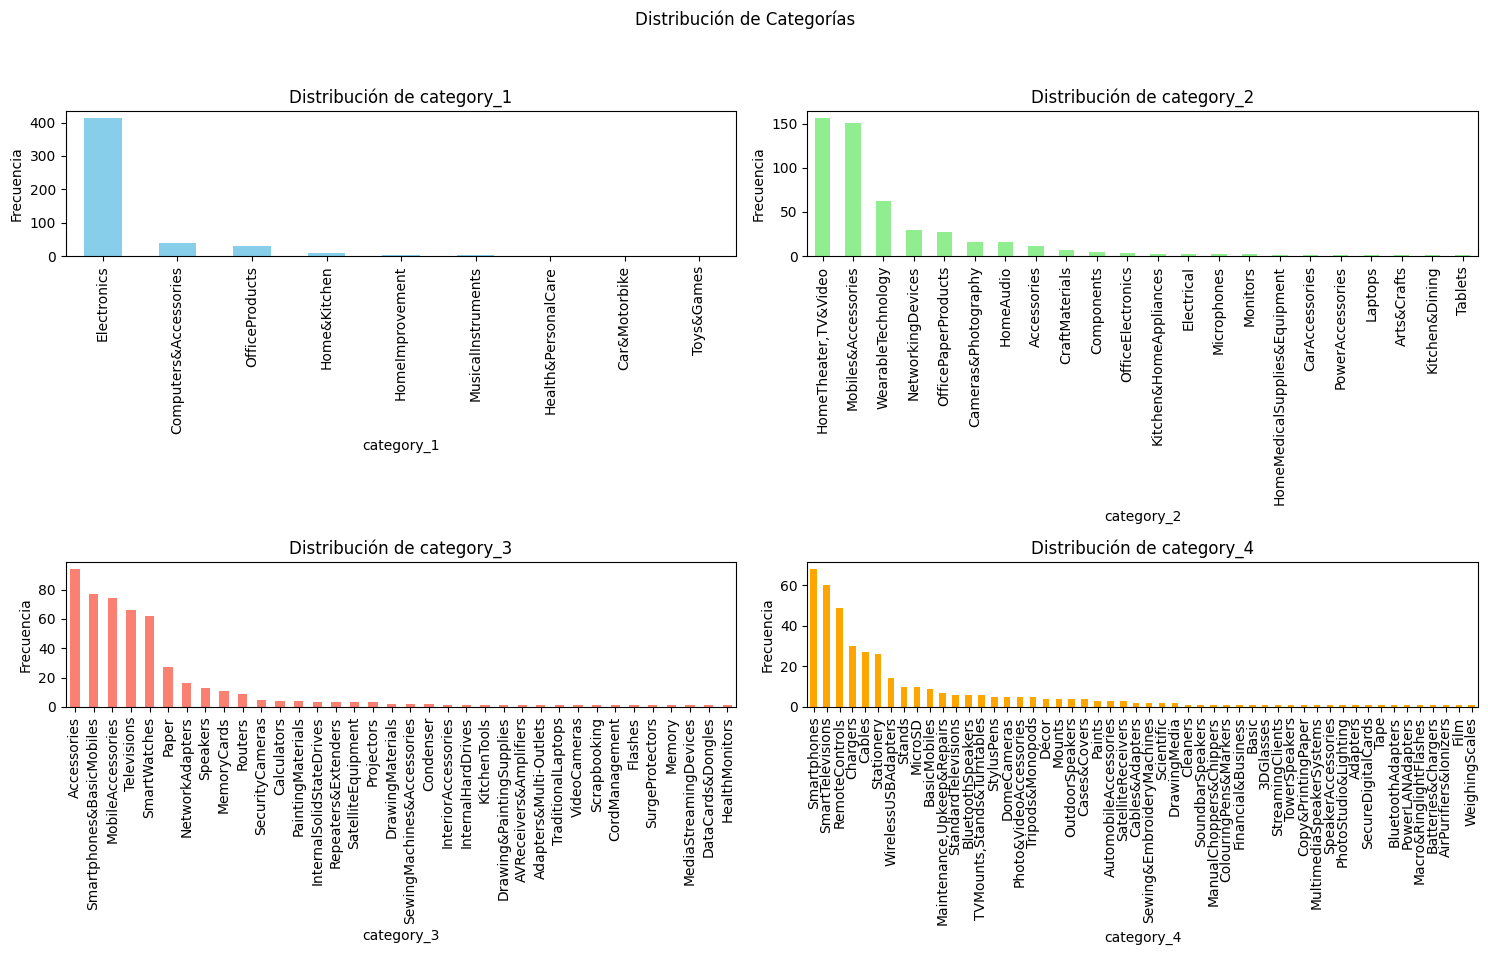

In [31]:
#Visualizar distribucion de Categorias
import pandas as pd
import matplotlib.pyplot as plt

# Crear una figura y ejes para los histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Categorías')

# Histograma para category_1
df['category_1'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de category_1')
axes[0, 0].set_xlabel('category_1')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma para category_2
df['category_2'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribución de category_2')
axes[0, 1].set_xlabel('category_2')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma para category_3
df['category_3'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribución de category_3')
axes[1, 0].set_xlabel('category_3')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma para category_4
df['category_4'].value_counts().plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribución de category_4')
axes[1, 1].set_xlabel('category_4')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar los histogramas
plt.show()


In [32]:
#Medidas de tendencia central actual_price
import pandas as pd

# Calcular las medidas de dispersión
desviacion_estandar = df['actual_price'].std()
varianza = df['actual_price'].var()
rango = df['actual_price'].max() - df['actual_price'].min()
rango_intercuartil = df['actual_price'].quantile(0.75) - df['actual_price'].quantile(0.25)

# Mostrar los resultados
print(f"Desviación Estándar: {desviacion_estandar}")
print(f"Varianza: {varianza}")
print(f"Rango: {rango}")
print(f"Rango Intercuartil (IQR): {rango_intercuartil}")


Desviación Estándar: 16067.91648563231
Varianza: 258177940.18925452
Rango: 139850
Rango Intercuartil (IQR): 12562.75


In [34]:
import pandas as pd

# Convertir la columna 'rating_count' a numérico (si es posible)
expanded_df['rating_count'] = pd.to_numeric(expanded_df['rating_count'], errors='coerce')

# Ahora puedes calcular los percentiles
percentil_25 = expanded_df['rating_count'].quantile(0.25)
percentil_50 = expanded_df['rating_count'].quantile(0.50)  # También es la mediana
percentil_75 = expanded_df['rating_count'].quantile(0.75)

print(f"Percentil 25: {percentil_25}")
print(f"Mediana (Percentil 50): {percentil_50}")
print(f"Percentil 75: {percentil_75}")


Percentil 25: 128.0
Mediana (Percentil 50): 305.0
Percentil 75: 557.0


In [35]:
#Cuartiles
# Calcular cuartiles explícitamente
cuartil_1 = expanded_df['rating_count'].quantile(0.25)
cuartil_2 = expanded_df['rating_count'].quantile(0.50)  # Es lo mismo que la mediana
cuartil_3 = expanded_df['rating_count'].quantile(0.75)

print(f"Cuartil 1 (Q1): {cuartil_1}")
print(f"Cuartil 2 (Q2): {cuartil_2} (Mediana)")
print(f"Cuartil 3 (Q3): {cuartil_3}")


Cuartil 1 (Q1): 128.0
Cuartil 2 (Q2): 305.0 (Mediana)
Cuartil 3 (Q3): 557.0


Analisis de sentimientos

In [50]:
# Cargar el DataFrame
df = pd.read_csv('/content/Data-Set-Limpio - Data_Set.csv')

In [62]:
print(expanded_df.columns)


Index(['product_id', 'product_name', 'category_1', 'category_2', 'category_3',
       'category_4', 'discounted_price', 'actual_price', 'discount_percentage',
       'about_product', 'user_id', 'user_name', 'user_id_count', 'review_id',
       'review_title', 'cleaned_review_content', 'rating_count',
       'adjusted_rating'],
      dtype='object')


In [79]:
import nltk
nltk.download('punkt')  # Descarga el paquete de tokenización

# Tokenizar cada contenido de la reseña en la columna 'cleaned_review_content'
expanded_df['tokenized_review'] = expanded_df['cleaned_review_content'].apply(nltk.word_tokenize)

# Mostrar los primeros registros con las reseñas tokenizadas
print(expanded_df[['cleaned_review_content', 'tokenized_review']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                              cleaned_review_content  \
0  This is aesthetically the most appealing Digit...   
1  As of now its working fine but dont expect mor...   
2  st product came faulty got it replaced replace...   
3  Torn packingdekhne me product used lg rha thaI...   
4  GoodI use this to solve my numericals and its ...   

                                    tokenized_review  
0  [This, is, aesthetically, the, most, appealing...  
1  [As, of, now, its, working, fine, but, dont, e...  
2  [st, product, came, faulty, got, it, replaced,...  
3  [Torn, packingdekhne, me, product, used, lg, r...  
4  [GoodI, use, this, to, solve, my, numericals, ...  


In [80]:
#Eliminacion de palabras vacias (Stopwords)
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

expanded_df['filtered_tokens'] = expanded_df['tokenized_review'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

print(expanded_df[['tokenized_review', 'filtered_tokens']].head())


                                    tokenized_review  \
0  [This, is, aesthetically, the, most, appealing...   
1  [As, of, now, its, working, fine, but, dont, e...   
2  [st, product, came, faulty, got, it, replaced,...   
3  [Torn, packingdekhne, me, product, used, lg, r...   
4  [GoodI, use, this, to, solve, my, numericals, ...   

                                     filtered_tokens  
0  [This, is, aesthetically, the, most, appealing...  
1  [As, of, now, its, working, fine, but, dont, e...  
2  [st, product, came, faulty, got, it, replaced,...  
3  [Torn, packingdekhne, product, used, lg, rha, ...  
4  [GoodI, use, this, to, solve, my, numericals, ...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
#Stemmedtización
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('spanish')

expanded_df['stemmed_tokens'] = expanded_df['filtered_tokens'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)

print(expanded_df[['filtered_tokens', 'stemmed_tokens']].head())



                                     filtered_tokens  \
0  [This, is, aesthetically, the, most, appealing...   
1  [As, of, now, its, working, fine, but, dont, e...   
2  [st, product, came, faulty, got, it, replaced,...   
3  [Torn, packingdekhne, product, used, lg, rha, ...   
4  [GoodI, use, this, to, solve, my, numericals, ...   

                                      stemmed_tokens  
0  [this, is, aesthetically, the, most, appealing...  
1  [as, of, now, its, working, fin, but, dont, ex...  
2  [st, product, cam, faulty, got, it, replac, re...  
3  [torn, packingdekhn, product, used, lg, rha, t...  
4  [goodi, use, this, to, solv, my, numericals, a...  


In [88]:
# Calcular el sentimiento,  asignar puntuaciones de sentimiento a cada texto.
from textblob import TextBlob

# Imprimir las primeras 5 filas para verificar los valores de 'sentiment'
print(final_df[['stemmed_tokens', 'sentiment']].head())

def analyze_sentiment(text):
    return TextBlob(" ".join(text)).sentiment.polarity

expanded_df['sentiment'] = expanded_df['stemmed_tokens'].apply(analyze_sentiment)

# Guardar el DataFrame con la columna 'sentiment' en una variable separada
final_df = expanded_df.copy()


                                      stemmed_tokens  sentiment
0  [this, is, aesthetically, the, most, appealing...   0.135799
1  [as, of, now, its, working, fin, but, dont, ex...   0.177407
2  [st, product, cam, faulty, got, it, replac, re...   0.268550
3  [torn, packingdekhn, product, used, lg, rha, t...   0.432984
4  [goodi, use, this, to, solv, my, numericals, a...   0.377778
count    500.000000
mean       0.273254
std        0.147528
min       -0.600000
25%        0.182148
50%        0.255192
75%        0.362167
max        1.000000
Name: sentiment, dtype: float64


Fila 0:

Tokens: ['this', 'is', 'aesthetically', 'the', 'most', 'appealing', ...]
Sentimiento: 0.135799
Interpretación: Este valor de sentimiento (0.135799) sugiere que el texto tiene un sentimiento ligeramente positivo. Es probable que las palabras en el texto estén expresando una opinión algo favorable, aunque no es un sentimiento muy fuerte.
Fila 1:

Tokens: ['as', 'of', 'now', 'its', 'working', 'fin', 'but', 'dont', ...]
Sentimiento: 0.177407
Interpretación: Este valor de sentimiento (0.177407) indica un sentimiento positivo, un poco más fuerte que el de la fila anterior. El texto podría estar reflejando una experiencia generalmente buena, pero con algunas dudas o críticas leves.
Fila 2:

Tokens: ['st', 'product', 'cam', 'faulty', 'got', 'it', 'replac', ...]
Sentimiento: 0.268550
Interpretación: Este valor de sentimiento (0.268550) es más positivo, lo que sugiere que el texto en general transmite una opinión bastante favorable, aunque podría incluir menciones a aspectos negativos, como problemas iniciales que fueron resueltos.
Fila 3:

Tokens: ['torn', 'packingdknh', 'product', 'used', 'lg', 'rha', ...]
Sentimiento: 0.423984
Interpretación: Este es el sentimiento más positivo hasta ahora (0.423984), lo que indica una fuerte satisfacción con el producto o servicio descrito. Las palabras probablemente reflejan una experiencia muy positiva.
Fila 4:

Tokens: ['goodi', 'use', 'this', 'to', 'solv', 'my', 'numericals', ...]
Sentimiento: 0.377778
Interpretación: Este valor de sentimiento (0.377778) también es bastante positivo, sugiriendo que el texto expresa una alta satisfacción o un resultado favorable al usar el producto o servicio.

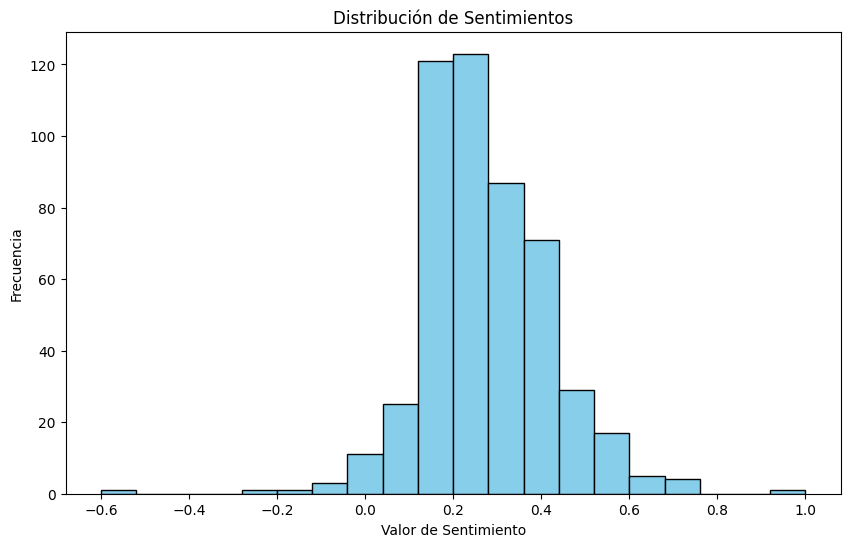

In [84]:
#Distribucion de los sentimientos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(expanded_df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Sentimientos')
plt.xlabel('Valor de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


In [85]:
print(expanded_df.columns)


Index(['product_id', 'product_name', 'category_1', 'category_2', 'category_3',
       'category_4', 'discounted_price', 'actual_price', 'discount_percentage',
       'about_product', 'user_id', 'user_name', 'user_id_count', 'review_id',
       'review_title', 'cleaned_review_content', 'rating_count',
       'adjusted_rating', 'tokenized_review', 'filtered_tokens',
       'stemmed_tokens', 'sentiment'],
      dtype='object')


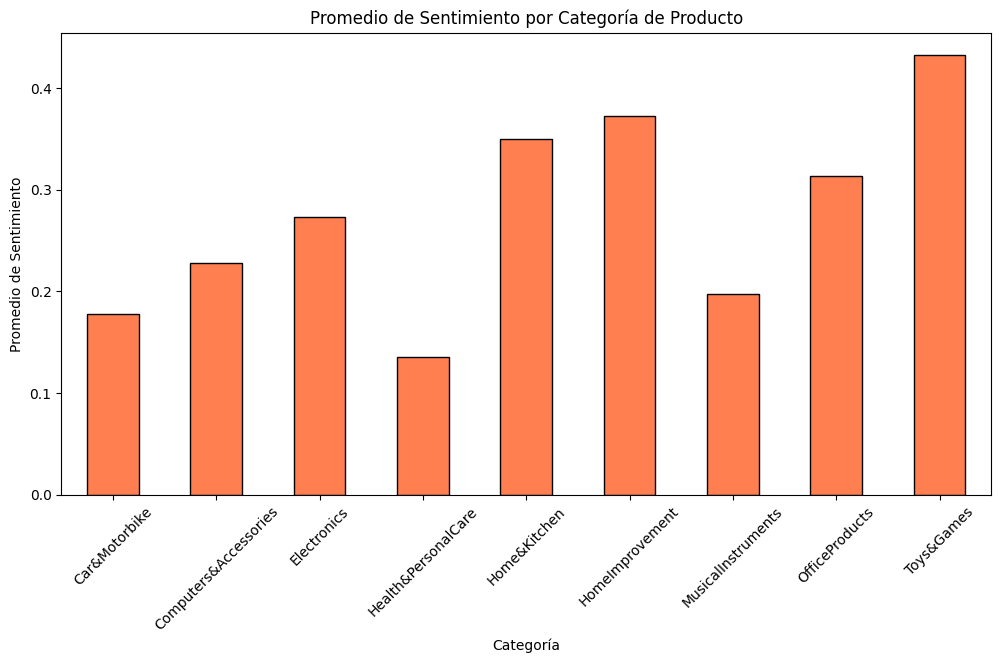

In [86]:
sentiment_by_category = expanded_df.groupby('category_1')['sentiment'].mean()

plt.figure(figsize=(12, 6))
sentiment_by_category.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Promedio de Sentimiento por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Promedio de Sentimiento')
plt.xticks(rotation=45)
plt.show()


Interpretación:
*Toys & Games: Tiene el promedio de sentimiento más alto, superior a 0.4. Esto sugiere que los productos en esta categoría generan una respuesta muy positiva en los usuarios.

*Home & Kitchen y Home Improvement: Ambas categorías también muestran un promedio de sentimiento alto, cercano a 0.4. Esto indica que los productos para el hogar son bien recibidos por los consumidores, con reseñas generalmente positivas.

*Office Products y Electronics: Estas categorías tienen un promedio de sentimiento moderado, alrededor de 0.3, lo que indica una percepción positiva, pero no tan fuerte como en las categorías mencionadas anteriormente.

*Computers & Accessories y Cars & Motorbike: Estas categorías tienen un promedio de sentimiento ligeramente inferior, cerca de 0.25, lo que sugiere una percepción favorable, aunque menos entusiasta que otras categorías.

*Musical Instruments y Health & Personal Care: Estas categorías tienen los promedios de sentimiento más bajos, siendo "Health & Personal Care" la que tiene el promedio más bajo, cercano a 0.15. Esto sugiere que las reseñas en estas categorías son menos positivas en comparación con las demás, lo que podría indicar problemas o insatisfacción con ciertos productos.

Correlación entre variables

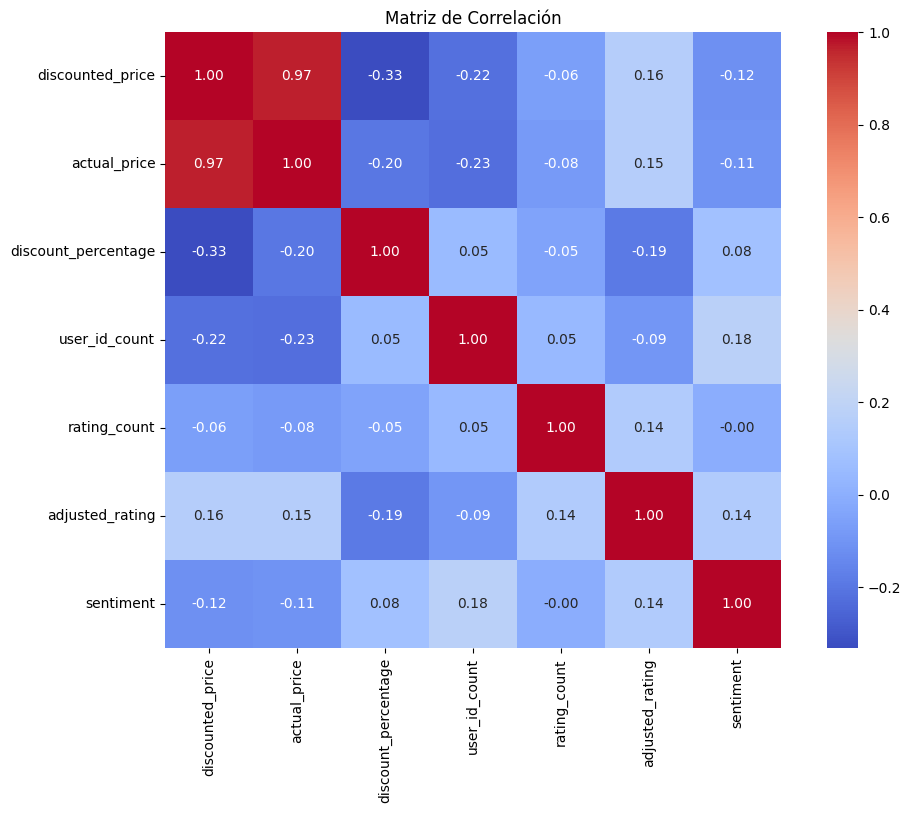

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = final_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de Correlación')
plt.show()
